<a href="https://colab.research.google.com/github/Sidhi11/PRODIGY_DS_01_Siddhi_Sawant/blob/main/CarPrice_Task2_prodigy_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
test=pd.read_csv('/content/test-data.csv')
train=pd.read_csv('/content/train-data.csv')

In [19]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [20]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [21]:
train.shape

(6019, 14)

In [22]:
test.shape

(1234, 13)

## **Data Cleaning**

In [55]:
train_cleaned = train.dropna()
test_cleaned = test.dropna()

In [56]:
print(train_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         823 non-null    int64  
 1   Name               823 non-null    object 
 2   Location           823 non-null    object 
 3   Year               823 non-null    int64  
 4   Kilometers_Driven  823 non-null    int64  
 5   Fuel_Type          823 non-null    object 
 6   Transmission       823 non-null    object 
 7   Owner_Type         823 non-null    object 
 8   Mileage            823 non-null    object 
 9   Engine             823 non-null    object 
 10  Power              823 non-null    object 
 11  Seats              823 non-null    float64
 12  New_Price          823 non-null    object 
 13  Price              823 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 96.4+ KB
None


In [57]:
print(test_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 2 to 1217
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         182 non-null    int64  
 1   Name               182 non-null    object 
 2   Location           182 non-null    object 
 3   Year               182 non-null    int64  
 4   Kilometers_Driven  182 non-null    int64  
 5   Fuel_Type          182 non-null    object 
 6   Transmission       182 non-null    object 
 7   Owner_Type         182 non-null    object 
 8   Mileage            182 non-null    object 
 9   Engine             182 non-null    object 
 10  Power              182 non-null    object 
 11  Seats              182 non-null    float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 19.9+ KB
None


In [23]:
train.duplicated().sum()

0

In [24]:
test.duplicated().sum()

0

In [25]:
train= train.drop_duplicates()
test= test.drop_duplicates()

## **EDA**

In [28]:
train.columns
test.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [50]:
test.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [51]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


### **Data Visualization**

<ipython-input-39-c2754019f501>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=train, palette='viridis')


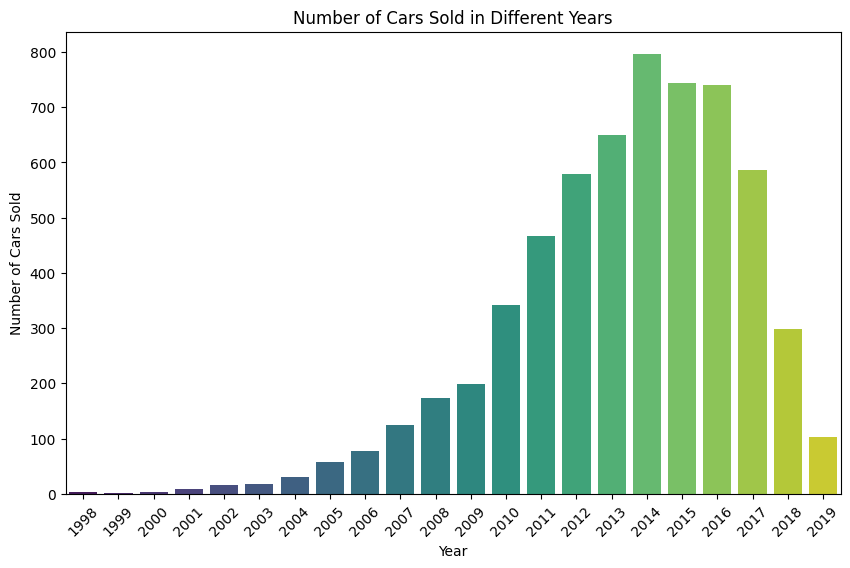

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=train, palette='viridis')
plt.title('Number of Cars Sold in Different Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-b309ce6af829>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=test, palette='viridis')


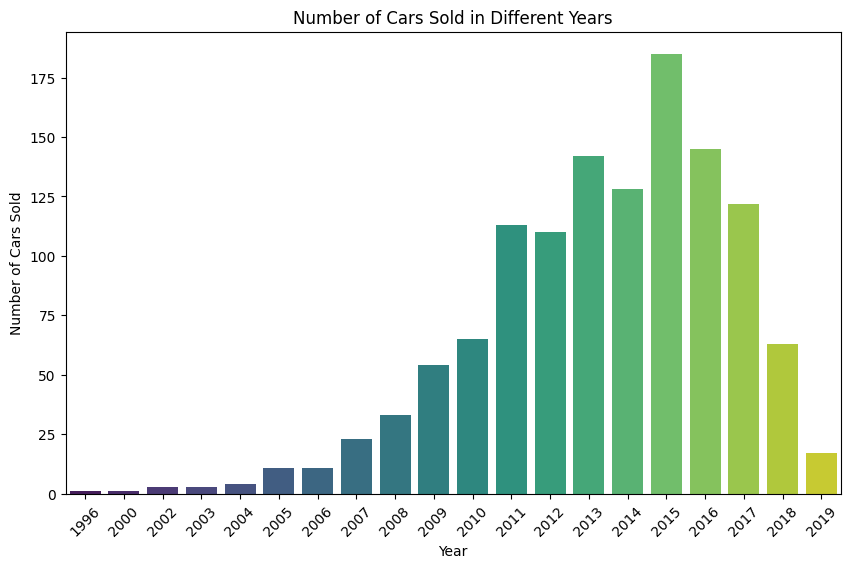

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=test, palette='viridis')
plt.title('Number of Cars Sold in Different Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

In [44]:
train_city_distribution = train['Location'].value_counts()

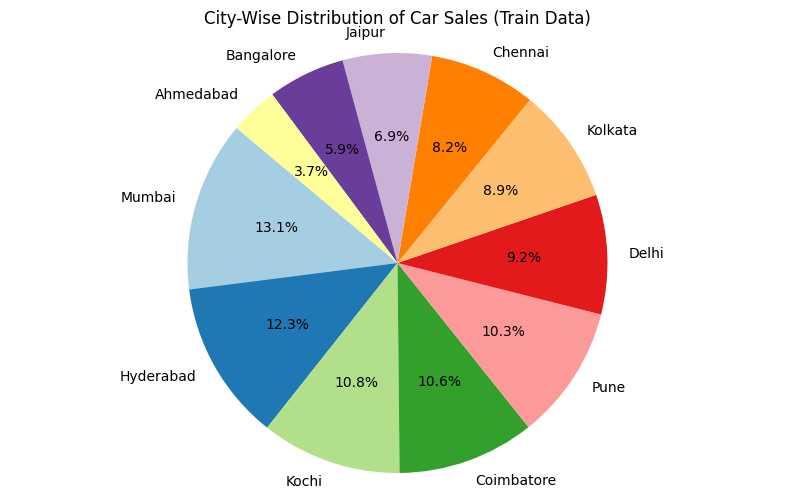

In [45]:
plt.figure(figsize=(10, 6))
plt.pie(train_city_distribution, labels=train_city_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(train_city_distribution))))
plt.title('City-Wise Distribution of Car Sales (Train Data)')
plt.axis('equal')
plt.show()

In [46]:
test_city_distribution = test['Location'].value_counts()

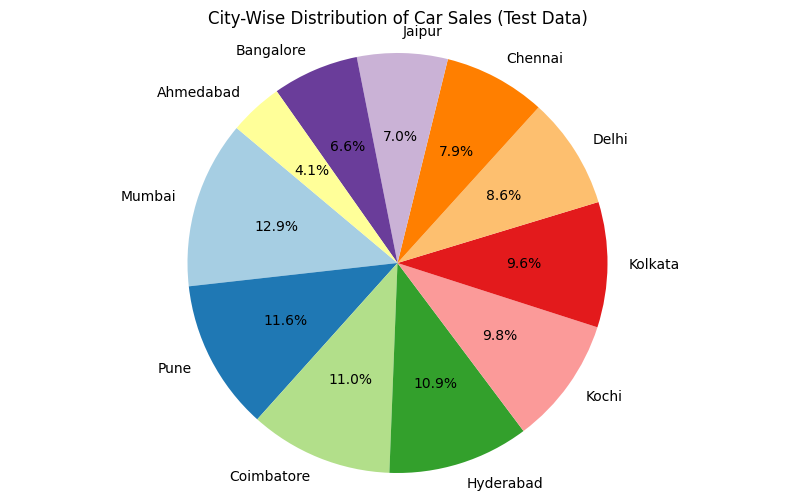

In [48]:
plt.figure(figsize=(10, 6))
plt.pie(test_city_distribution, labels=test_city_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(test_city_distribution))))
plt.title('City-Wise Distribution of Car Sales (Test Data)')
plt.axis('equal')
plt.show()

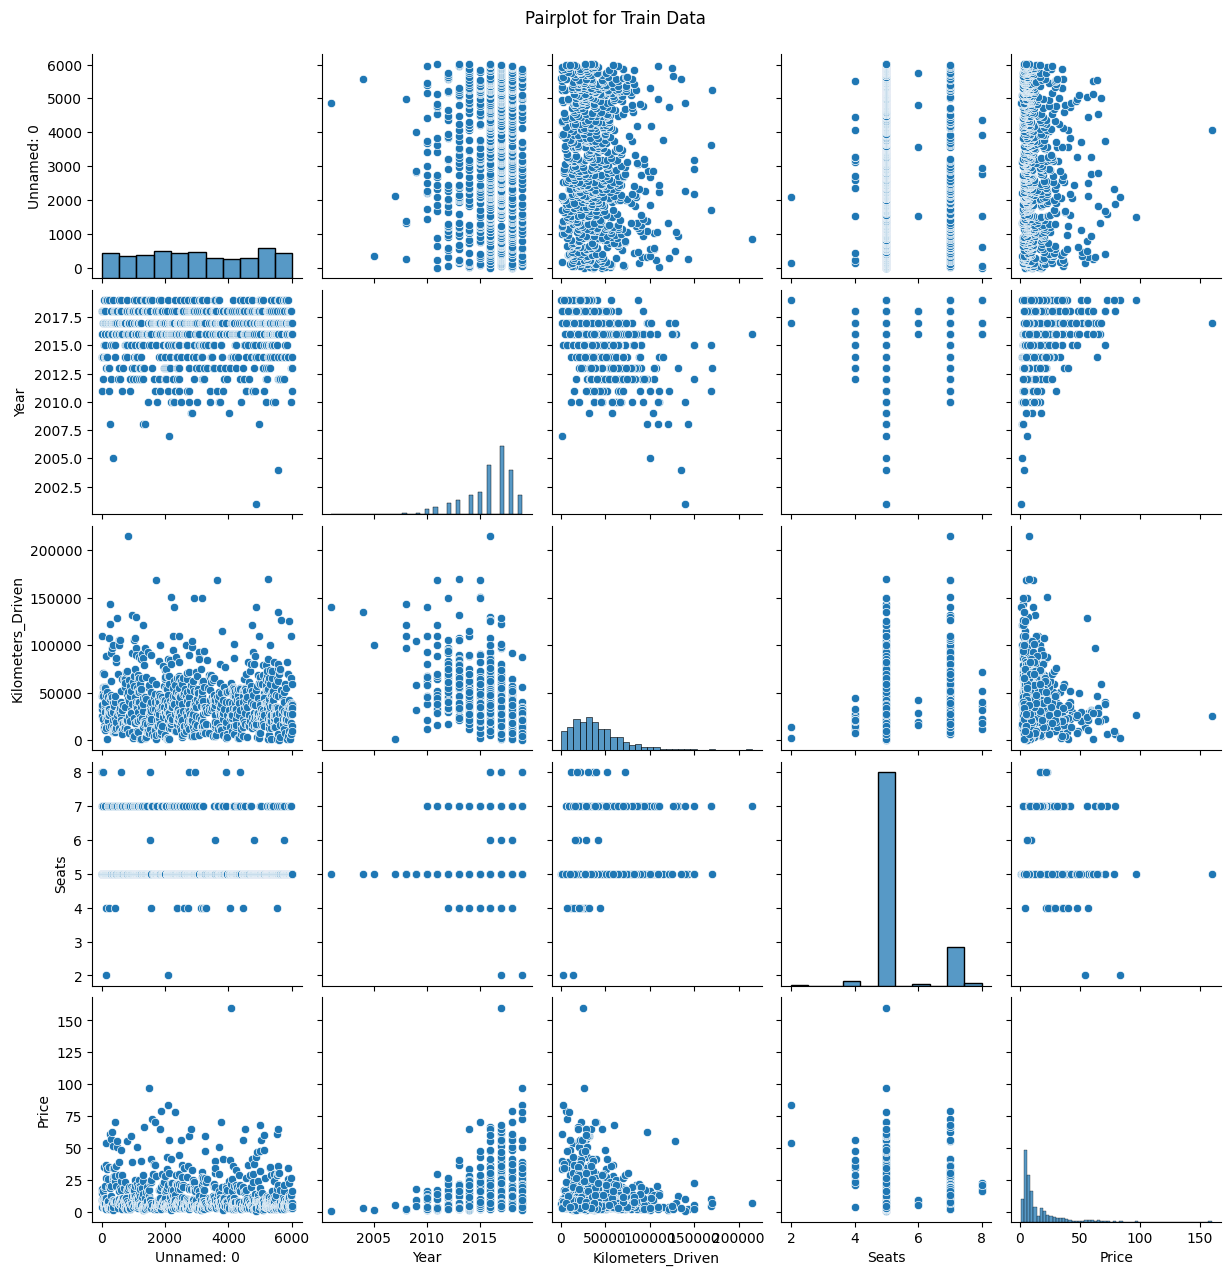

In [61]:
sns.pairplot(train_cleaned)
plt.suptitle('Pairplot for Train Data', y=1.02)
plt.show()

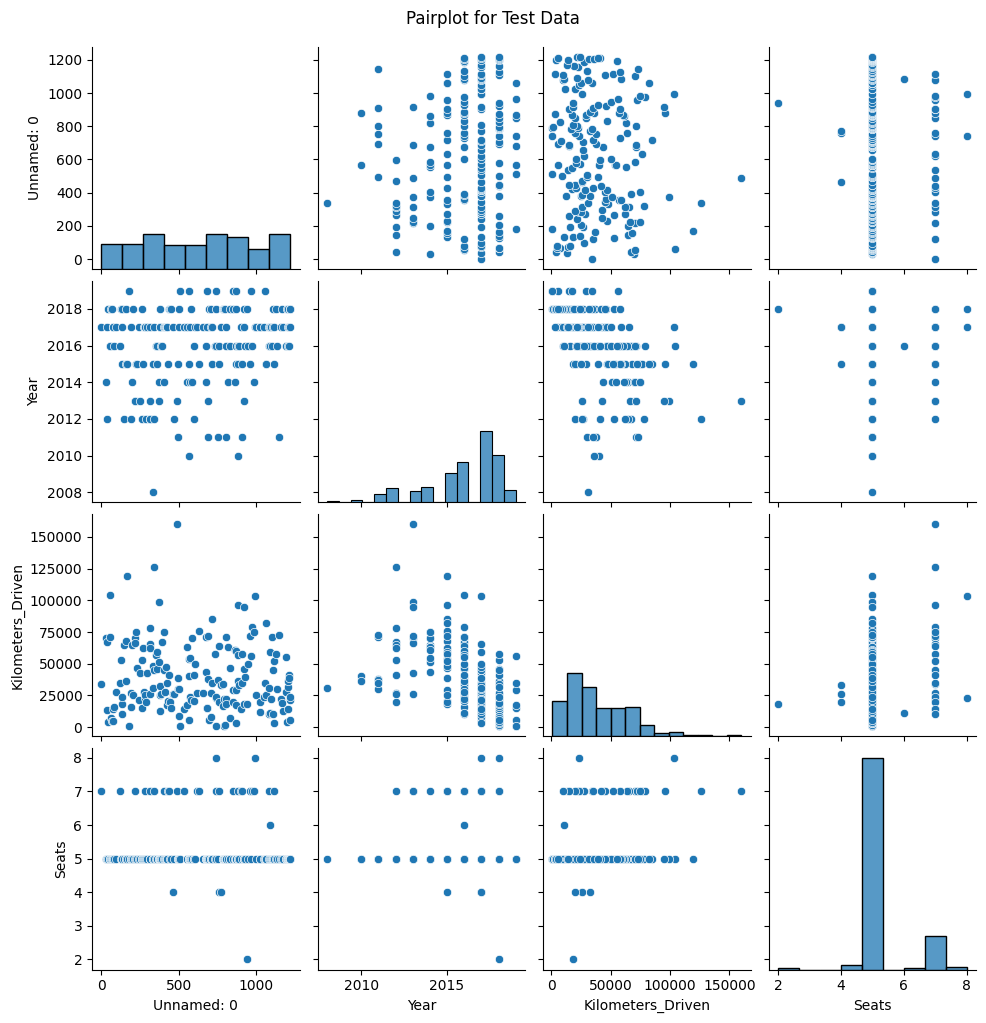

In [62]:
sns.pairplot(test_cleaned)
plt.suptitle('Pairplot for Test Data', y=1.02)
plt.show()